In [1]:
import chex
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from simplexity.generative_processes.hidden_markov_model import HiddenMarkovModel
from simplexity.generative_processes.mixed_state_presentation import LogMixedStateTreeGenerator
from simplexity.generative_processes.transition_matrices import mess3

In [2]:
def validate_2_simplex(belief_states: jax.Array) -> None:
    """Validate that the belief states are a valid 2-simplex."""
    nodes = belief_states.shape[0]
    assert belief_states.shape == (nodes, 3)
    belief_sum = jnp.sum(belief_states, axis=1)
    chex.assert_trees_all_close(belief_sum, jnp.ones_like(belief_sum))

In [3]:
theta = jnp.pi / 3
M = jnp.array([[1.0, 0.0], [jnp.cos(theta), jnp.sin(theta)]])


def plot_2_simplex(belief_states: jax.Array, figure_scale: float = 10) -> None:
    """Plot the belief states in the 2-simplex."""
    XY = belief_states[:, :2] @ M
    x = XY[:, 0]
    y = XY[:, 1]

    w = float(figure_scale * M[0, 0])
    h = float(figure_scale * M[1, 1])

    plt.scatter(x, y, c=belief_states, s=1)
    plt.gcf().set_size_inches(w, h)
    plt.axis("off")
    plt.show()

In [4]:
transition_matrix = mess3(x=0.15, a=0.6)
hmm = HiddenMarkovModel(transition_matrix)
generator = LogMixedStateTreeGenerator(hmm, max_sequence_length=8)
tree = generator.generate()

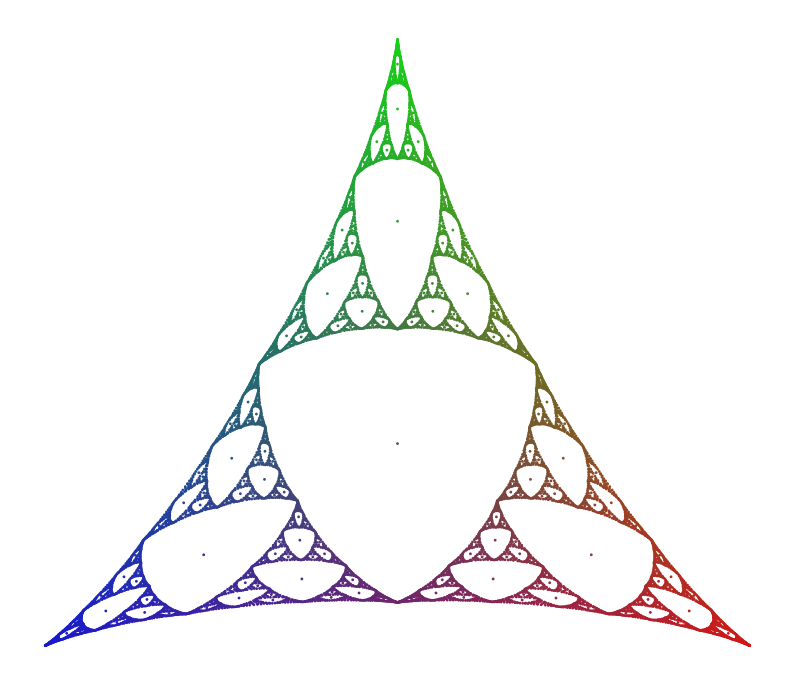

In [5]:
log_belief_states = jnp.array([v.log_belief_state for v in tree.nodes.values()])
belief_states = jnp.exp(log_belief_states)
validate_2_simplex(belief_states)
plot_2_simplex(belief_states)

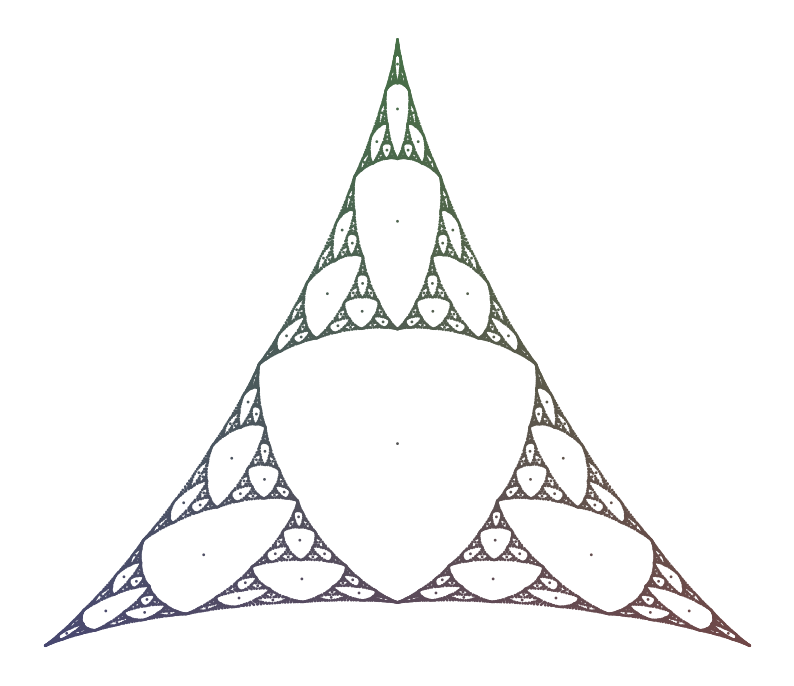

In [6]:
log_observation_distribution = jnp.array(
    [hmm.log_observation_probability_distribution(jnp.array(v.log_belief_state)) for v in tree.nodes.values()]
)
observation_distribution = jnp.exp(log_observation_distribution)
validate_2_simplex(observation_distribution)
plot_2_simplex(observation_distribution)